# Plotting Categorical Data

In this section, we will:
- Plot distributions of data across categorical variables
- Plot aggregate/summary statistics across categorical variables


## Plotting Distributions Across Categories

We have seen how to plot distributions of data. Often, the distributions reveal new information when you plot them across categorical variables.

Let's see some examples.

In [1]:
# loading libraries and reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")

# read data
market_df = pd.read_csv("./global_sales_data/market_fact.csv")
customer_df = pd.read_csv("./global_sales_data/cust_dimen.csv")
product_df = pd.read_csv("./global_sales_data/prod_dimen.csv")
shipping_df = pd.read_csv("./global_sales_data/shipping_dimen.csv")
orders_df = pd.read_csv("./global_sales_data/orders_dimen.csv")


### Boxplots 

We had created simple boxplots such as the ones shown below. Now, let's plot multiple boxplots and see what they can tell us the distribution of variables across categories.

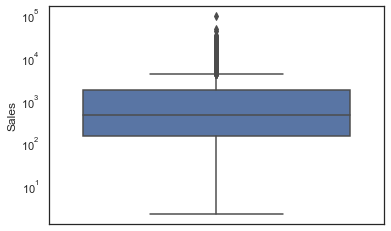

In [5]:
#boxplot of a variable
sns.boxplot(y=market_df['Sales'])
plt.yscale('log')
plt.show()

Now, let's say you want to **compare the (distribution of) sales of various product categories**. Let's first merge the product data into the main dataframe.

In [7]:
# merge the dataframe to add a categorical variable
df=pd.merge(market_df,product_df,how='inner',on='Prod_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


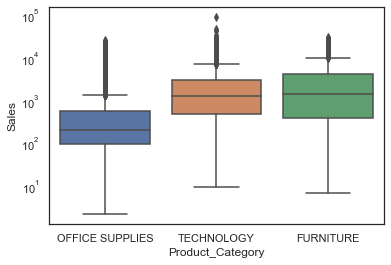

In [8]:
# boxplot of a variable across various product categories
sns.boxplot(x='Product_Category',y='Sales',data=df)
plt.yscale('log')
plt.show()

So this tells you that the sales of office supplies are, on an average, lower than the other two categories. The sales of technology and furniture categories seem much better. Note that each order can have multiple units of products sold, so Sales being higher/lower may be due to price per unit or the number of units.

Let's now plot the other important variable - Profit.

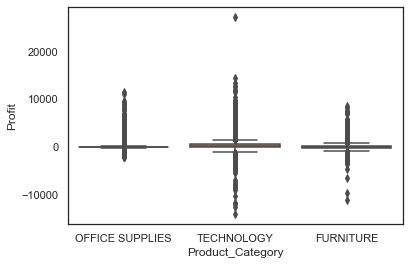

In [9]:
# boxplot of a variable across various product categories
sns.boxplot(x='Product_Category',y='Profit',data=df)
plt.show()

Profit clearly has some *outliers* due to which the boxplots are unreadable. Let's remove some extreme values from Profit (for the purpose of visualisation) and try plotting.

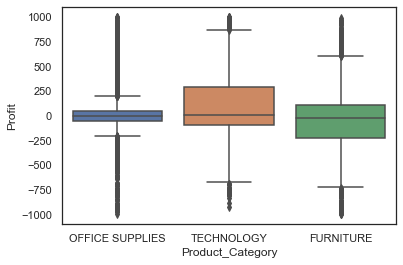

In [10]:
df = df[(df.Profit<1000) & (df.Profit>-1000)]

# boxplot of a variable across various product categories
sns.boxplot(x='Product_Category', y='Profit', data=df)
plt.show()

We can see that though the category 'Technology' has better sales numbers than others, it is also the one where the **most loss making transactions** happen. You can drill further down into this.

